In [1]:
# Carregamento do dataset
from sklearn.datasets import load_digits
digits = load_digits()
data = []
a = [data.append(digits['data'][i]) if digits['target'][i] == 5 else None for i in range(len(digits['data']))]

In [2]:
import numpy as np
X = np.matrix(data)

In [3]:
# Iniciais
L = 40
D = X.shape[1]
N = X.shape[0]
mi = X.mean(axis = 0)
W = np.ones((D, L))
I = np.eye(L)
sig2 = 1

In [4]:
for i in range(1000):
    # Passo E
    M = W.T @ W + sig2 * I
    Minv = np.linalg.pinv(M)
    Ez = Minv @ W.T @ (X - np.repeat(mi, N, axis = 0)).T
    Ezz = sig2 * Minv + Ez @ Ez.T

    # Passo M
    W = (X - np.repeat(mi, N, axis = 0)).T @ Ez.T @ np.linalg.inv(Ezz)
    sig2 = 1.0/(N*D) * (np.power((X - np.repeat(mi, N, axis = 0)),2)).sum() - 2 * ((Ez.T @ W.T).T @ (X - np.repeat(mi, N, axis = 0))).sum() + np.trace(Ezz.T @ W.T @ W)

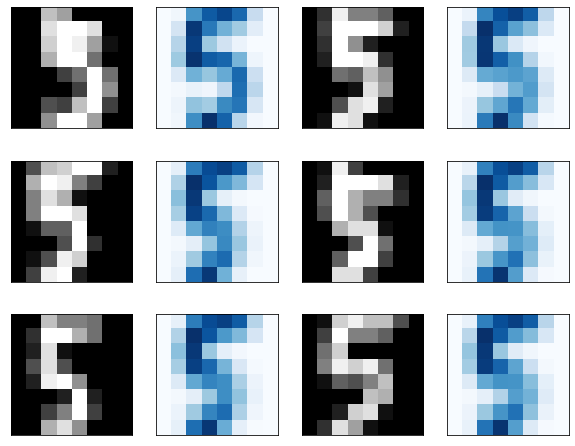

In [5]:
# Reconstrução do dataset a partir do modelo
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = [10, 8])

for i in range(3):
    zi = Minv @ W.T @ (X[i] - mi).T
    xi = ((W @ zi).T + mi)
    sample = X[i].reshape((8,8))
    recons = xi.reshape((8,8))
    ax[i, 0].set_yticks([]);ax[i, 0].set_xticks([]);
    ax[i, 0].imshow(sample, cmap='gray')
    ax[i, 1].set_yticks([]);ax[i, 1].set_xticks([]);
    ax[i, 1].imshow(recons, cmap='Blues')
    
    zi = Minv @ W.T @ (X[i+3] - mi).T
    xi = ((W @ zi).T + mi)
    sample = X[i+5].reshape((8,8))
    recons = xi.reshape((8,8))
    ax[i, 2].set_yticks([]);ax[i, 2].set_xticks([]);
    ax[i, 2].imshow(sample, cmap='gray')
    ax[i, 3].set_yticks([]);ax[i, 3].set_xticks([]);
    ax[i, 3].imshow(recons, cmap='Blues')
    
fig.savefig(f'output/recon_{L}.png')

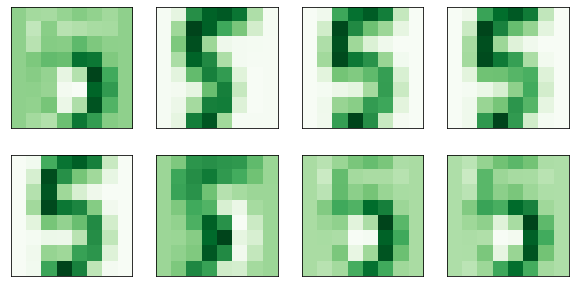

In [6]:
# Geração de novas amostras
from numpy.random import multivariate_normal

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = [10, 5])
for i in range(8):
    zi = np.matrix(multivariate_normal(mean = np.zeros(L), cov = np.eye(L))).T
    xi = ((W @ zi).T + mi).reshape((8,8))
    ax[i // 4, i % 4].set_yticks([]);ax[i // 4, i % 4].set_xticks([]);
    ax[i // 4, i % 4].imshow(xi, cmap='Greens')

fig.savefig(f'output/gen_{L}.png')